<a href="https://colab.research.google.com/github/Akshita0502/Google-Homepage/blob/main/project_completed1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***STUDENT DASHBAORD DATA ANALYSIS***



1.  **LOADING THE DATASET**



In [ ]:
import pandas as pd
data = {
    "Student_ID": [101,102,103,104,105,106,107,108,109,110],
    "Name": ["Arjun","Meera","Rahul","Neha","Aman","Priya","Karan","Simran","Ravi","Isha"],
    "Math_Score": [78,56,92,35,67,85,45,72,60,88],
    "Reading_Score": [65,59,88,42,73,90,50,70,55,94],
    "Writing_Score": [72,61,91,39,70,84,48,75,58,90],
    "Study_Hours": [10,6,15,4,8,12,5,9,7,14],
    "Attendance": [85,72,95,60,80,92,68,88,75,97]
}

df = pd.DataFrame(data)
print(df)



2.  **BASIC INFORMATION ABOUT THE DATASET**



In [ ]:
df.describe()

*  **Conclusion:**
Math scores are stable with an average of 67.8 and low spread and std dev 18.9. Reading avg score is 68.6, std dev is 17.8.
Writing avg score is 68.8, std dev is 17.4 show wider variation.
Study hours average 9.0 and std dev is 3.7.
Attendance is fairly high with an average of 81.2% and std dev 12.3.

In [ ]:
df.info()
df.dtypes

* The dataset consists of integer values and an object column - Name.
* There is no categorical data present.  

3. **CHECKING FOR MISSING VALUES**

*   **FIRST METHOD - CLASSIC OR THE TRADITIONAL METHOD**

In [ ]:
df.isnull().sum()



*  **USING DATA VISUALIZATION METHODS - SNS LIBRARY**




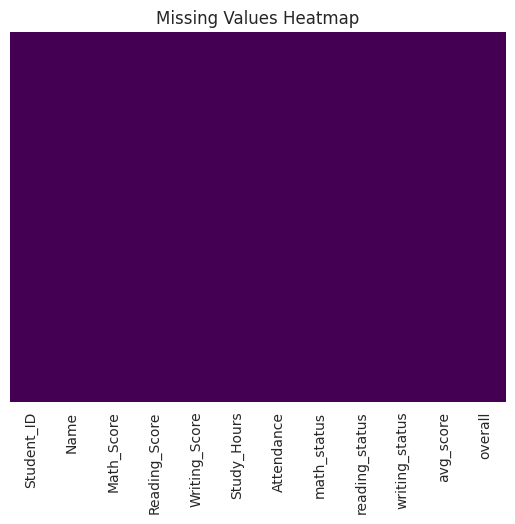

In [47]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


*   There is no missing value.





* **CHECKING FOR DUPLICATES**  


In [ ]:
df.duplicated()

There is no duplicate value.




4.  **PROBLEM STATEMENT 01**  **- PASS VS FAIL STUDENTS**










*  **CREATING NEW COLUMN - PASS VS FAIL - STATUS**




In [8]:
df["math_status"] = df["Math_Score"].apply(lambda x: "Pass" if x >= 40 else "Fail")
df["reading_status"] = df["Reading_Score"].apply(lambda x: "Pass" if x >= 40 else "Fail")
df["writing_status"] = df["Writing_Score"].apply(lambda x: "Pass" if x >= 40 else "Fail")
print(df)

   Student_ID    Name  Math_Score  Reading_Score  Writing_Score  Study_Hours  \
0         101   Arjun          78             65             72           10   
1         102   Meera          56             59             61            6   
2         103   Rahul          92             88             91           15   
3         104    Neha          35             42             39            4   
4         105    Aman          67             73             70            8   
5         106   Priya          85             90             84           12   
6         107   Karan          45             50             48            5   
7         108  Simran          72             70             75            9   
8         109    Ravi          60             55             58            7   
9         110    Isha          88             94             90           14   

   Attendance math_status reading_status writing_status  
0          85        Pass           Pass           Pass  
1  



*  **DATA VISUALIZATION PASS VS FAIL**




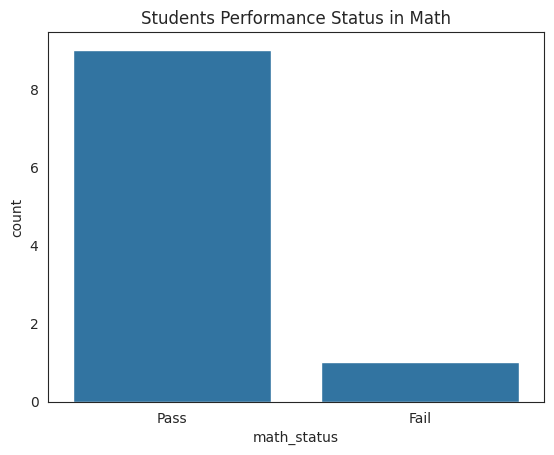

In [50]:
sns.countplot(data=df, x="math_status")
plt.title("Students Performance Status in Math")
plt.show()

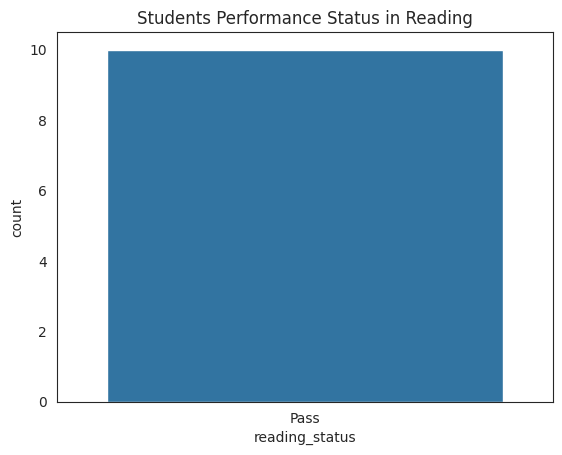

In [49]:
sns.countplot(data=df, x="reading_status")
plt.title("Students Performance Status in Reading")
plt.show()

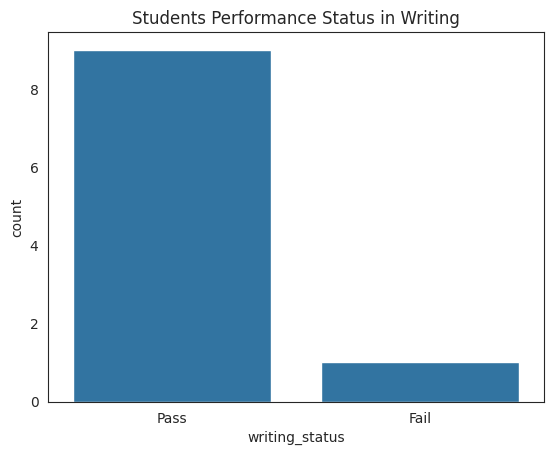

In [51]:
sns.countplot(data=df, x="writing_status")
plt.title("Students Performance Status in Writing")
plt.show()


* **Conclusion** - The majority of students have successfully passed their exams. For Math, around 9 students cleared the subject while only 1 failed. In Reading, all students passed with no failures recorded. For Writing, the results mirrored Math, with 9 passes and just 1 failure. This indicates overall strong performance, with only minor challenges in Math and Writing.



*   **CREATING NEW COLUMN**   **- AVERAGE SCORE**


In [12]:
df["avg_score"] = df.apply(lambda x: ((x['Math_Score']+x['Reading_Score']+ x["Writing_Score"])/3), axis=1)
print(df)

   Student_ID    Name  Math_Score  Reading_Score  Writing_Score  Study_Hours  \
0         101   Arjun          78             65             72           10   
1         102   Meera          56             59             61            6   
2         103   Rahul          92             88             91           15   
3         104    Neha          35             42             39            4   
4         105    Aman          67             73             70            8   
5         106   Priya          85             90             84           12   
6         107   Karan          45             50             48            5   
7         108  Simran          72             70             75            9   
8         109    Ravi          60             55             58            7   
9         110    Isha          88             94             90           14   

   Attendance math_status reading_status writing_status  avg_score  
0          85        Pass           Pass          

In [ ]:
df["overall"]= df["avg_score"].apply(lambda x: "Pass" if x >= 40 else "Fail")
print(df)

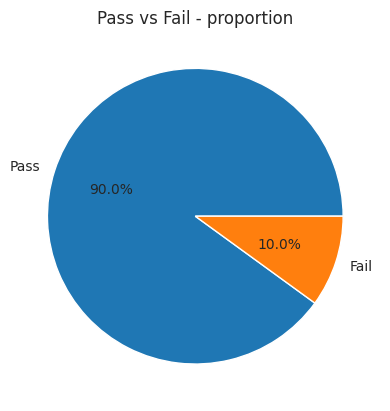

In [40]:
import matplotlib.pyplot as plt
plt.pie(df["overall"].value_counts(), labels=df["overall"].value_counts().index, autopct="%1.1f%%")
plt.title("Pass vs Fail - proportion")
plt.show()



*  **Conclusion** - 90% of students have performed well, while the remaining 10% need to put in additional effort to improve.



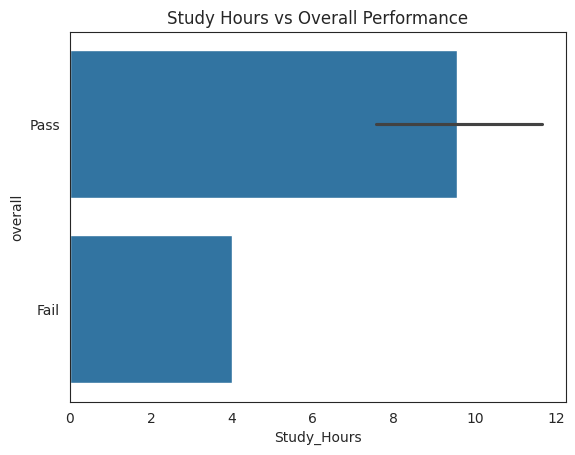

In [36]:
sns.barplot(y="overall", x="Study_Hours", data=df)
plt.title("Study Hours vs Overall Performance")
plt.show()



*  **Conclusion-** The plot clearly states that there is a relationship between status of result of the students with their study hours.





5. **PROBLEM STATEMENT 02** **-AVERAGE STUDY HOURS OF STUDENTS PASSING VS FAILING**


In [16]:
df.groupby("overall")["Study_Hours"].mean()

,Study_Hours
overall,
Fail,4.000000
Pass,9.555556




*  **Conclusion-** The students who have passed study for average 9 hours whereas the one who failed studied for 4 hours only.



In [17]:

df.loc[df["avg_score"].idxmax()]

,9
Student_ID,110
Name,Isha
Math_Score,88
Reading_Score,94
Writing_Score,90
Study_Hours,14
Attendance,97
math_status,Pass
reading_status,Pass
writing_status,Pass




* **Conclusion-** Isha achieved the highest score by studying 14 hours straight. Interestingly, her attendance was also 97%, which, although not part of the main analysis, suggests that regular class attendance can positively influence performance.



In [18]:
df.loc[df["Study_Hours"].idxmax()]

,2
Student_ID,103
Name,Rahul
Math_Score,92
Reading_Score,88
Writing_Score,91
Study_Hours,15
Attendance,95
math_status,Pass
reading_status,Pass
writing_status,Pass




* **Conclusion-** Rahul studied the maximum hours - 15 and scored around 90%. His attendance was also 95%, reinforcing the close relationship between study hours and performance, as well as attendance and performance





6. **PROBLEM STATEMENT 03- STUDIED THE MOST BUT SCORED AVERAGE**



In [19]:

avg_study = df["Study_Hours"].mean()

studied_but_avg = df[(df["Study_Hours"] > avg_study) &
                     (df["avg_score"].between(60, 75))]

print(studied_but_avg[["Name", "Study_Hours", "avg_score", "Attendance"]])

    Name  Study_Hours  avg_score  Attendance
0  Arjun           10  71.666667          85




* **Conclusion-** **Arjun has performed at an average level in every subject, which brought down his overall score. He needs to improve consistently across all subjects.**


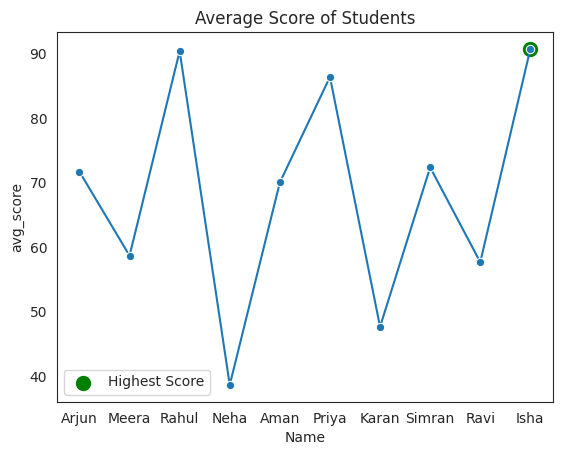

In [34]:
sns.lineplot(data=df,x="Name", y = "avg_score", marker = "o")
df_sorted = df.sort_values("avg_score")
highest = df_sorted.loc[df_sorted["avg_score"].idxmax()]
plt.scatter(highest["Name"], highest["avg_score"], color="green", s =100, label="Highest Score")
plt.legend()
plt.title("Average Score of Students")
plt.show()
sns.set_style("white")

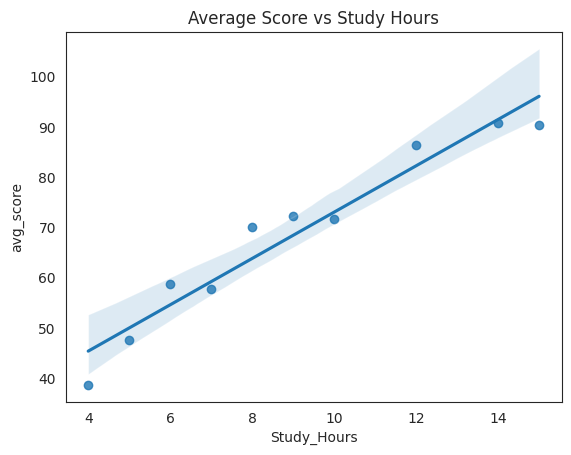

In [30]:
sns.regplot(data=df, x="Study_Hours", y="avg_score")
plt.title("Average Score vs Study Hours")
sns.set_style("dark")

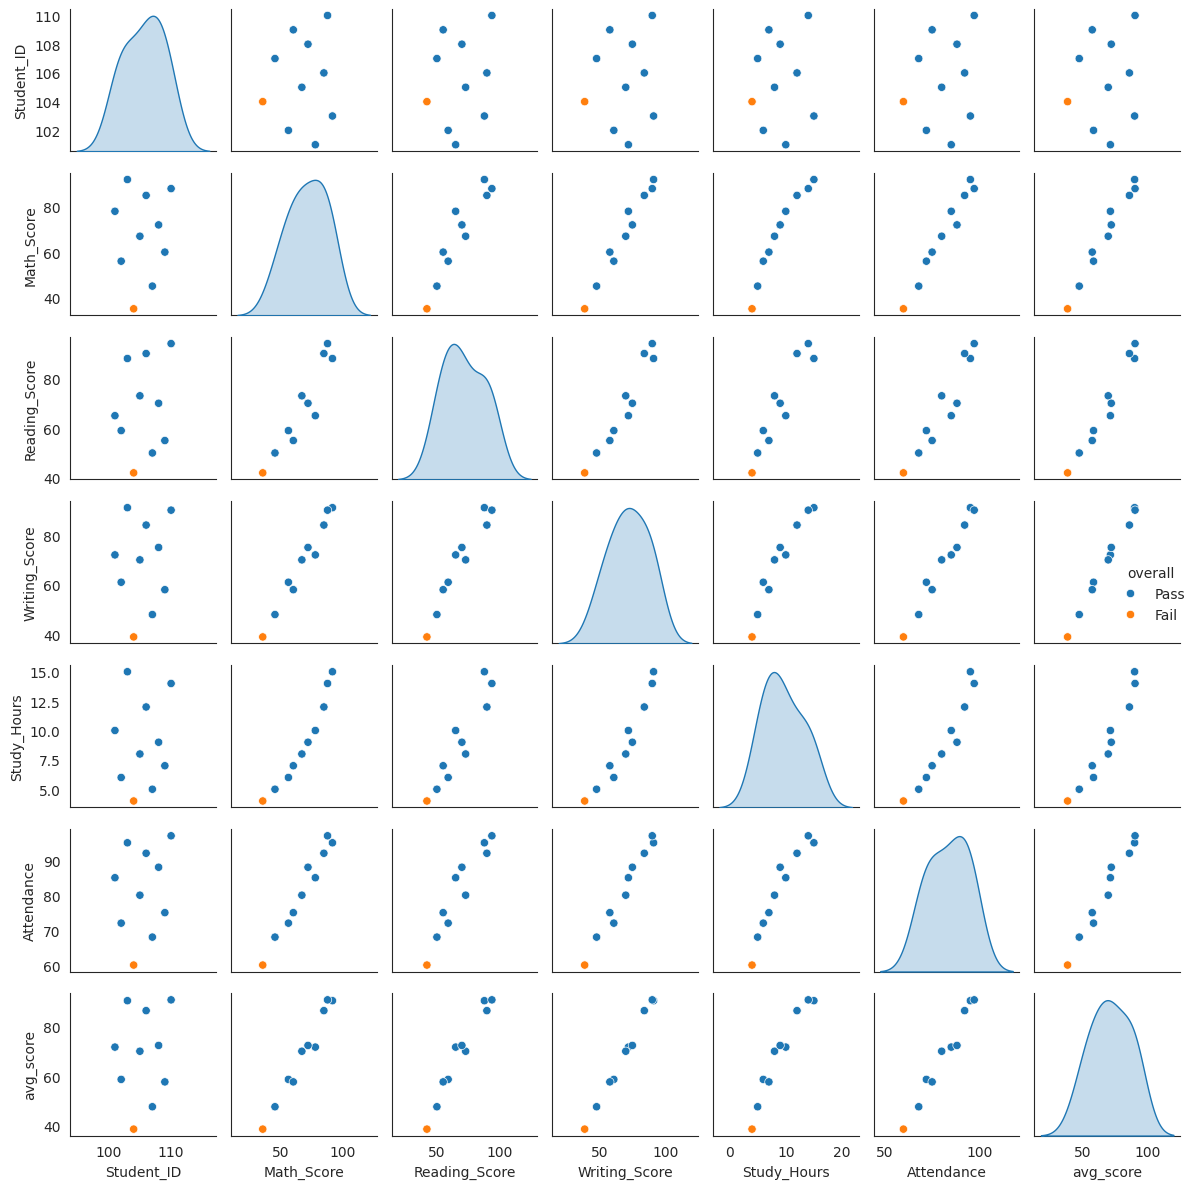

In [48]:
g = sns.pairplot(df, hue="overall")

g.fig.set_size_inches(12, 12)

plt.tight_layout()




* **Conclusion**-The above pair plot shows positive relationships between study hours, attendance, and average scores, reinforcing earlier findings.










7. **KEY FINDINGS AND SUGGESTIONS-**
    

*  Students who failed studied the least hours 4 hrs.


*  Higher study hours and attendance consistently lead to better performance.

*   Average performers, like Arjun need subject-wise improvement despite adequate effort.
*   Encourage consistent attendance >85%, as it correlates with higher scores.













